<a href="https://colab.research.google.com/github/ndorazio137/jlabAirplanesHitBirds/blob/main/AirplanesThatHitBirds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 
!pip install kaggle
 
from google.colab import files
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
 
!kaggle datasets download -d faa/wildlife-strikes
 
!unzip /content/wildlife-strikes.zip
 
import pandas as pd 
import numpy as np; 
import seaborn as sns; 
import matplotlib.pyplot as plt
 
basepath = "/content/"
df = pd.read_csv(basepath + "database.csv")

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes
wildlife-strikes.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/wildlife-strikes.zip
replace database.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: database.csv            


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

In [ ]:
df.isna().sum().sum()

1834042

In [ ]:
df

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,4.0,34.0,40,2.0,D,1,1.0,NaN,NaN,KCVG,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,ASO,NaN,CLIMB,NaN,NaN,NaN,NaN,NaN,NE1,GULL,1,NaN,NaN,NaN,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,4.0,34.0,10,2.0,D,5,5.0,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,TAKEOFF RUN,NaN,NaN,0.0,NaN,0.0,ZZ201,HOUSE SPARROW,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,NaN,NaN,NaN,NaN,NaN,0.0,R1101,BARN OWL,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,3.0,22.0,NaN,2.0,D,NaN,NaN,NaN,NaN,KMYR,MYRTLE BEACH INTL,SC,ASO,NaN,APPROACH,DAY,NaN,200.0,138.0,NaN,UNKBM,UNKNOWN MEDIUM BIRD,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KJAX,JACKSONVILLE INTL,FL,ASO,NaN,CLIMB,DAY,NaN,100.0,200.0,NaN,ZX,FINCH,1,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,4.0,10.0,1,2.0,D,1,1.0,NaN,NaN,UNKN,NaN,NaN,NaN,N,NaN,NaN,NONE,NaN,NaN,NaN,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,4.0,10.0,1,2.0,D,1,1.0,NaN,NaN,KDAL,DALLAS LOVE FIELD ARPT,TX,ASW,N,APPROACH,DAY,NONE,5000.0,250.0,25.0,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49,2.0,46.0,1,2.0,D,5,5.0,NaN,NaN,KMIA,MIAMI INTL,FL,ASO,NaN,CLIMB,DAY,NONE,3000.0,200.0,5.0,K1002,TURKEY VULTURE,1,NONE,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,3.0,31.0,10,2.0,C,4,4.0,NaN,NaN,KPDX,PORTLAND INTL (OR),OR,ANM,Y,DESCENT,NIGHT,NONE,6000.0,NaN,NaN,Z6014,HERMIT THRUSH,1,NONE,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Kyle's work
df3_0 = df[df['Incident Year'] > 2014].copy()
df3 = df3_0[['Operator','Aircraft', 'Airport ID', 'Incident Month', 'Incident Year', 'Incident Day']].copy()
# The following few lines would only need to be present if we were predicting Aircraft or Airport ID.
#df3 = df3.loc[df['Aircraft'] != 'UNKNOWN']
#df3 = df3.loc[df['Airport ID'] != 'UNKN']
#df3 = df3.loc[df['Airport ID'] != 'ZZZZ']

df3.dropna(axis=0)
df3.info()

df3['Incident Month'].value_counts().sort_index()

df3.isna().sum().sum()
df3

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10148 entries, 163956 to 174103
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Operator        10148 non-null  object
 1   Aircraft        10148 non-null  object
 2   Airport ID      10148 non-null  object
 3   Incident Month  10148 non-null  int64 
 4   Incident Year   10148 non-null  int64 
 5   Incident Day    10148 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 555.0+ KB


,Operator,Aircraft,Airport ID,Incident Month,Incident Year,Incident Day
163956,VOLARIS,A-320,KSMF,1,2015,1
163957,UNKNOWN,UNKNOWN,KGNV,1,2015,1
163958,BUSINESS,EC135,ZZZZ,1,2015,1
163959,ALASKA AIRLINES,B-737-800,ZZZZ,1,2015,1
163960,AMERICAN AIRLINES,MD-82,KSMF,1,2015,1
...,...,...,...,...,...,...
174099,SOUTHWEST AIRLINES,B-737-700,UNKN,9,2015,30
174100,SOUTHWEST AIRLINES,B-737-700,KDAL,9,2015,30
174101,BUSINESS,CITATIONJET,KMIA,9,2015,30
174102,HORIZON AIR,DHC8 DASH 8,KPDX,9,2015,30


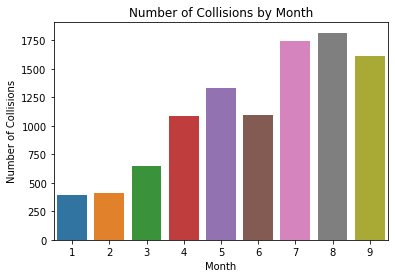

In [ ]:

# Kyle's work

#foo = df3.pivot('Aircraft','Airport ID','Incident Month')
#sns.heatmap(df3)
 
collisions = df3['Incident Month'].value_counts().sort_index()
ax = sns.barplot(x=collisions.index, y=collisions)
ax.set_title('Number of Collisions by Month')
ax.set_ylabel('Number of Collisions')
ax.set_xlabel('Month')
plt.show()

In [ ]:
# Brian 
# Violin Plot does not appear to be the one we want for our project. 
# Pairing requires having some polar relationship between two things. 
# There are too many variables within our data to pair them up and be able to address our main goals.
# violin = sns.violinplot(x='Incident Month', y='Aircraft Model', data=df2, palette=["lightblue", "orange"])
# plt.xlabel("Airport ID")
# plt.ylabel("Incident Month")
# plt.title("Violin Plot")
# plt.show()

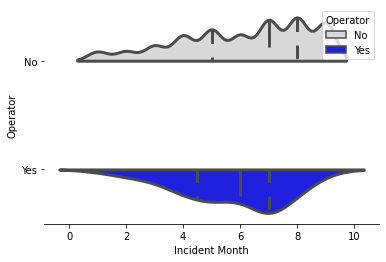

In [ ]:
# Brian
# This is another violin idea. The only thing I could think of that might be paired together are
# Military vs. Non-military aircraft. To get this, I need to replace the 'Operator' 
# strings with either "Yes" or "No" for Military aircraft.

df5 = df3[['Operator', 'Incident Month']].copy()
df5['Operator'].mask(df5['Operator'] != 'MILITARY', 'No', inplace=True)
df5['Operator'] = df5['Operator'].replace(regex='MILITARY', value='Yes')
sns.violinplot(data=df5, x="Incident Month", y="Operator", hue="Operator",
               split=True, inner="quart", linewidth=3,
               palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

In [ ]:
df4 = pd.get_dummies(df3, drop_first = True)

In [ ]:
s1 = sns.pairplot(df4, kind="hist")
s1

In [ ]:
#sns.pairplot(df4, kind="scatter")


In [ ]:
#sns.pairplot(df4, kind="reg")


In [ ]:
#sns.pairplot(df4, kind="kde")